In [58]:
import json
import sys
import numpy as np
import numpy.ma as ma
from itertools import zip_longest
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from ast import literal_eval
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '/Users/chrislam/Desktop/sculpting/'
df = pd.read_csv(path+'hipergator/logLs.csv')
berger_kepler = pd.read_csv(path+'berger_kepler_stellar17.csv') 
k = [833, 134, 38, 15, 5, 0] # EXCLUDES THE ZERO BIN

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Figure 1

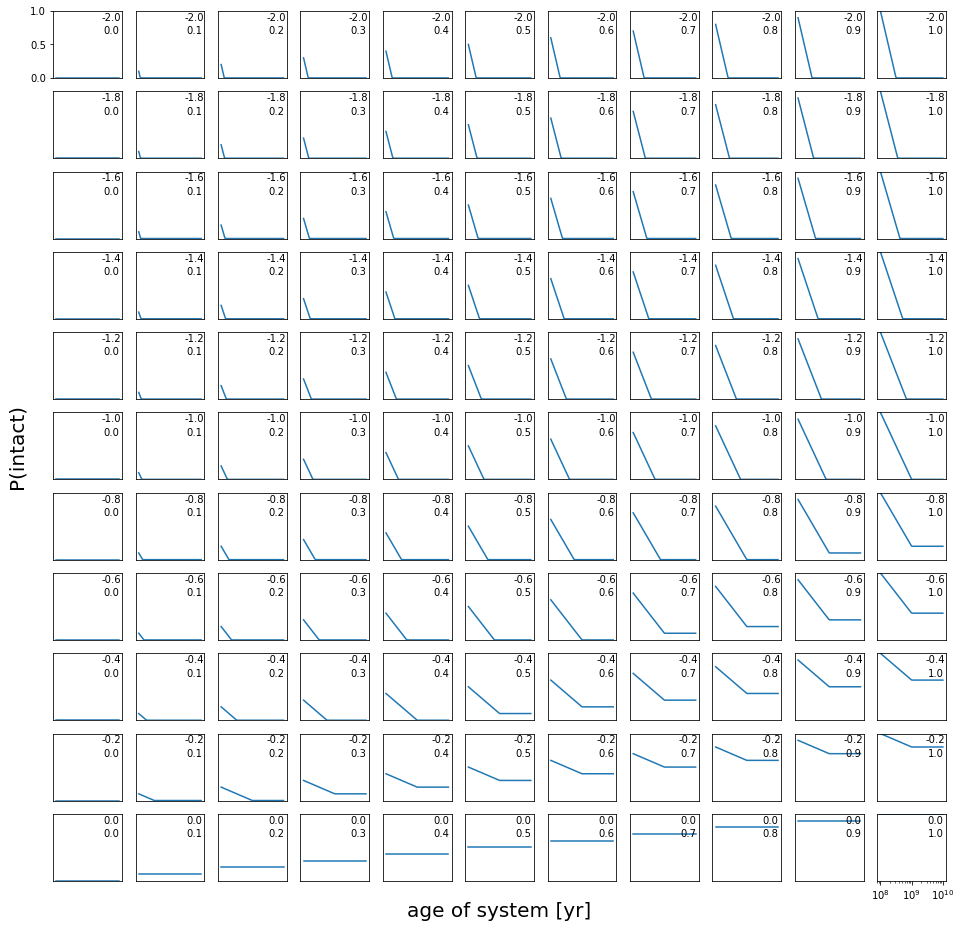

In [24]:
def plot_prob(x, m, b, cutoff):
    #return x*np.log10(m) + b
    #return -np.log10(x*m) + b
    #return -np.log10(x*m) + b # y=mx+b
    #return -np.log10(m * (x-1e8)) + b # linear equation given slope and one point, but with slope and x axis logged
    y = []
    for x_elt in x:
        if x_elt <= 1e8:
            y.append(b)
        elif (x_elt > 1e8) & (x_elt <= cutoff):
            y_elt = b + m*(np.log10(x_elt)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt)
        elif x_elt > cutoff: # if star is older than cutoff, use P(intact) at cutoff time
            y_elt = b + m*(np.log10(cutoff)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt) 
            
    return y

x = np.logspace(8, 10, 100)
fig, axes = plt.subplots(figsize=(16,16))
index = 0
ms = np.linspace(-2, 0, 11)
bs = np.linspace(0, 1, 11)
for i, gi_m in enumerate(ms):
    for j, gi_b in enumerate(bs):
        ax = plt.subplot2grid((11,11), (i,j))
        ax.text(0.85, 0.9, round(gi_m, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.text(0.85, 0.7, round(gi_b, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        
        #cube = [random.uniform(0,1), random.uniform(0,1)]
        #cube = prior_grid(cube, ndim, nparams, gi_m, gi_b)
        cutoff = 1e9 # placeholder
        #print(round(gi_m, 1), df.bs[index])
        y = plot_prob(x, round(gi_m, 1), round(gi_b, 1), cutoff)
        #y = compute_prob(x, round(gi_m, 1), df.bs[index], cutoff)
        #y = prob_intact(x, round(df.ms[index], 1), df.bs[index], cutoff)
        #y = prob_intact(x, np.linspace(-1,0,11)[gi_m], np.linspace(0,1,11)[gi_b])
        ax.plot(x, y)
        ax.set_ylim([0, 1])
        
        if index < 1:
            ax.get_yaxis().set_visible(True)
        else:
            ax.get_yaxis().set_visible(False)
        
        if index < 120:
            ax.get_xaxis().set_visible(False)
        else:
            ax.get_xaxis().set_visible(True)            

        ax.set_xscale('log')
        
        index += 1
        
        # plot vertical red line through median age of Berger FGK dwarfs
        #ax.plot([1e9*np.median(berger_kepler.iso_age), 1e9*np.median(berger_kepler.iso_age)], 
        #        [0,1], color='r', alpha=0.3, linestyle='--')

# add axis labels in the middle of the subplot
fig.add_subplot(111, frameon=False)
# this hack introduces tick marks, so hide them
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('age of system [yr]', fontsize=20)
plt.ylabel('P(intact)', fontsize=20)
plt.savefig(path+'paper/models.eps', format='eps')
plt.show()

### Misc stats and plots for Master's presentation

In [60]:
# amd of solar sys; from https://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?bibcode=1997A%26A...317L..75L&db_key=AST&page_ind=0&data_type=GIF&type=SCREEN_VIEW&classic=YES
#2.2e8*(1e-10)*(1e33)*(1.5e13)**2/(3.154e7)
1500*(1e-10)*(1e33)*(1.5e13)**2/(3.154e7)

1.0700697526949903e+45

In [89]:
# eccentricities and inclinations of Solar System planets
ecc_ss = [0.2056, 0.0068, 0.0167, 0.0934, 0.0484, 0.0541, 0.0472, 0.0086]
inc_ss = np.array([6.34, 2.19, 1.57, 1.67, 0.32, 0.93, 1.02, 0.72])
print(np.mean(ecc_ss))
print(np.mean(inc_ss))
print(np.median(ecc_ss))
print(np.median(inc_ss))

0.0601
1.845
0.047799999999999995
1.295


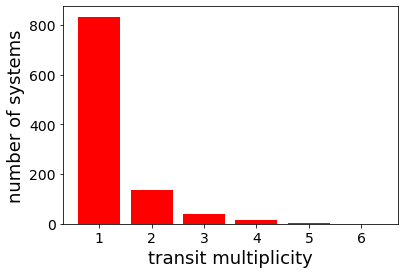

In [98]:
plt.bar(np.arange(len(k)+1)[1:], k, color='r')
plt.xlabel('transit multiplicity', fontsize=18)
plt.ylabel('number of systems', fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.savefig('kepler_transit_multiplicity.eps', format='eps', bbox_inches='tight')
plt.show()

In [80]:
df.transit_multiplicities_all

0               [[3977, 402], [4094, 385], [4070, 385]]
1      [[4073, 416, 1, 1], [4071, 422], [4077, 397, 1]]
2     [[4133, 370, 2, 1], [4054, 370, 1, 3], [4070, ...
3            [[4059, 408, 1], [4048, 397], [4050, 414]]
4     [[3926, 391, 2, 1, 1], [4061, 414, 1, 1], [411...
5     [[3864, 548, 130, 79, 32, 7], [3883, 526, 137,...
6     [[3794, 676, 257, 173, 79, 16], [3667, 647, 26...
7         [[4053, 388], [4007, 413, 1], [3964, 421, 1]]
8     [[4092, 387, 1, 1], [4027, 417, 1], [4003, 404...
9     [[3883, 524, 136, 107, 33, 10], [3922, 572, 13...
10    [[3819, 690, 246, 165, 97, 11], [3856, 680, 26...
11    [[3569, 816, 390, 240, 129, 19], [3665, 770, 3...
12    [[3596, 937, 475, 389, 158, 39], [3468, 903, 5...
13           [[4154, 393, 1], [4100, 374], [4002, 401]]
14    [[3872, 547, 127, 75, 43, 6], [3995, 495, 147,...
15    [[3748, 668, 276, 168, 82, 18], [3891, 659, 26...
16    [[3617, 783, 373, 278, 130, 23], [3627, 804, 3...
17    [[3531, 930, 516, 365, 173, 30], [3461, 87

### Pymultinest

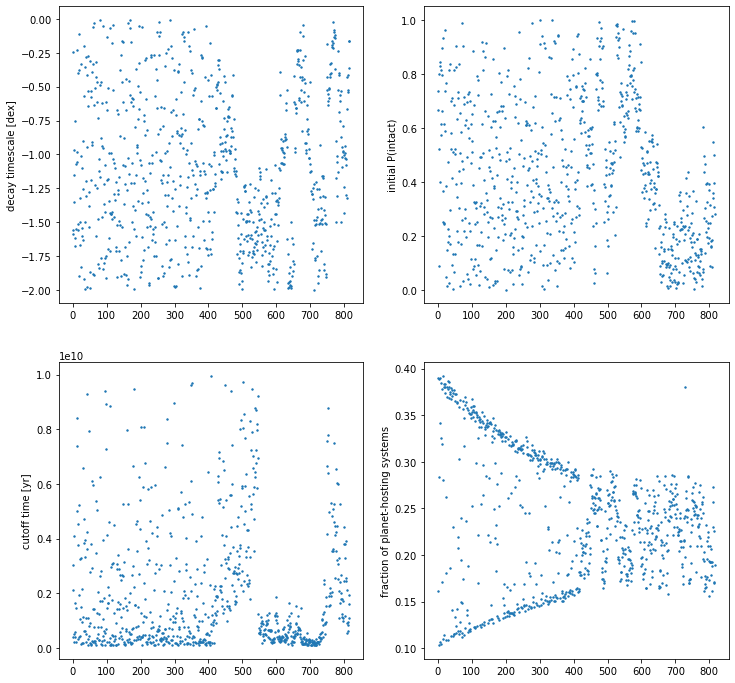

In [91]:
multinest_df = pd.read_csv(path+'hipergator/pymultinest/test_1_.txt', sep='\s+',
                           names=['error','logL','m','b','c','f'])
#print(multinest_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(multinest_df.index, multinest_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(multinest_df.index, multinest_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(multinest_df.index, multinest_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(multinest_df.index, multinest_df.f, s=2)
ax4.set_ylabel('fraction of planet-hosting systems')
plt.savefig('posterior_chains.eps', format='eps')
plt.show()

Try again for pymultinest_high_tol

             error        logL         m         b             c             f
0     1.412725e-99   -0.639910 -0.426715 -1.605104  8.407106e-01  2.219612e+08
1     4.065389e-99   -0.641271 -1.268289 -1.731951  5.469165e-01  2.340361e+09
2     9.462665e-99   -0.637602 -0.708728 -0.988518  4.254534e-01  2.978705e+09
3     1.075091e-98   -0.408702 -1.074832 -0.168163  4.258413e-01  2.808818e+09
4     1.784343e-98   -0.420937 -1.692351 -0.544841  4.464637e-01  1.819966e+09
...            ...         ...       ...       ...           ...           ...
2004  1.194674e-01   43.211705 -1.918286  0.891319  1.803193e+09  1.721834e-01
2005  1.238899e-10   84.585538 -1.636592  0.896887  1.798842e+09  2.259866e-01
2006  3.119875e-17  114.974590 -1.898040  0.581691  2.343831e+09  2.299637e-01
2007  8.876935e-25  149.724624 -1.670611  0.715282  2.925876e+09  2.137313e-01
2008  3.601615e-27  160.739113 -1.831811  0.769500  2.563936e+09  2.567947e-01

[2009 rows x 6 columns]


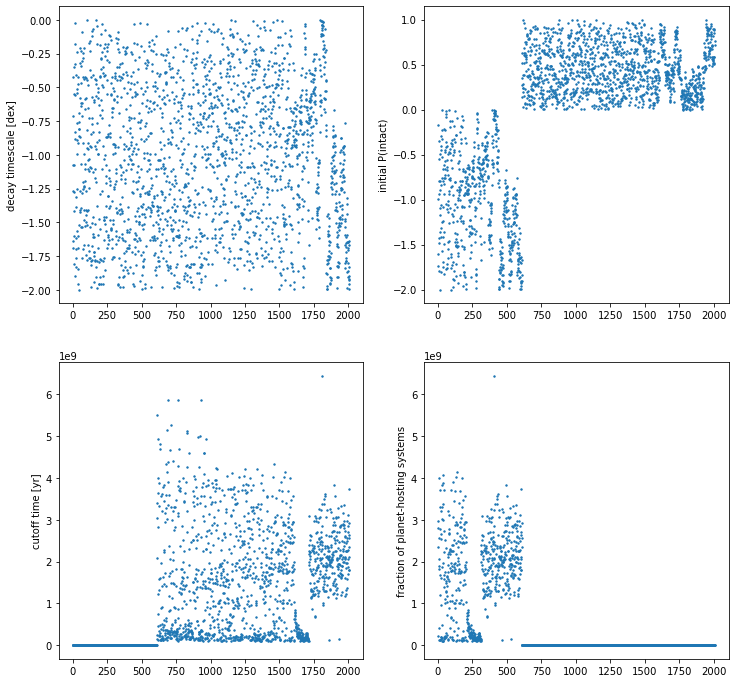

In [7]:
multinest_df = pd.read_csv(path+'hipergator/pymultinest_test/test_1_old.txt', sep='\s+',
                           names=['error','logL','m','b','c','f'])
print(multinest_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(multinest_df.index, multinest_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(multinest_df.index, multinest_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(multinest_df.index, multinest_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(multinest_df.index, multinest_df.f, s=2)
ax4.set_ylabel('fraction of planet-hosting systems')
#plt.savefig('posterior_chains.eps', format='eps')
plt.show()

Tolerance was clearly too high. It was 5? 10? 

             error        logL         m         b             c
0     1.035172e-99  522.068515 -1.233066  0.577031  1.045258e+08
1     5.653044e-98  514.063090 -0.317597  0.124647  6.515052e+08
2     5.730688e-97  509.425638 -1.883967  0.983707  1.513978e+08
3     4.059603e-95  500.899798 -0.336418  0.976871  1.267962e+09
4     5.731167e-95  500.205130 -0.615496  0.835851  1.955423e+08
...            ...         ...       ...       ...           ...
2231  4.040643e-04   72.678671 -0.566766  0.507990  5.284780e+08
2232  1.110270e-03   70.657103 -0.551295  0.487208  4.878342e+08
2233  1.643840e-04   74.477410 -0.604142  0.554073  5.467913e+08
2234  1.184140e-03   70.528276 -0.697289  0.633970  5.908384e+08
2235  1.582376e-04   74.553625 -0.484415  0.442858  4.968985e+08

[2236 rows x 5 columns]


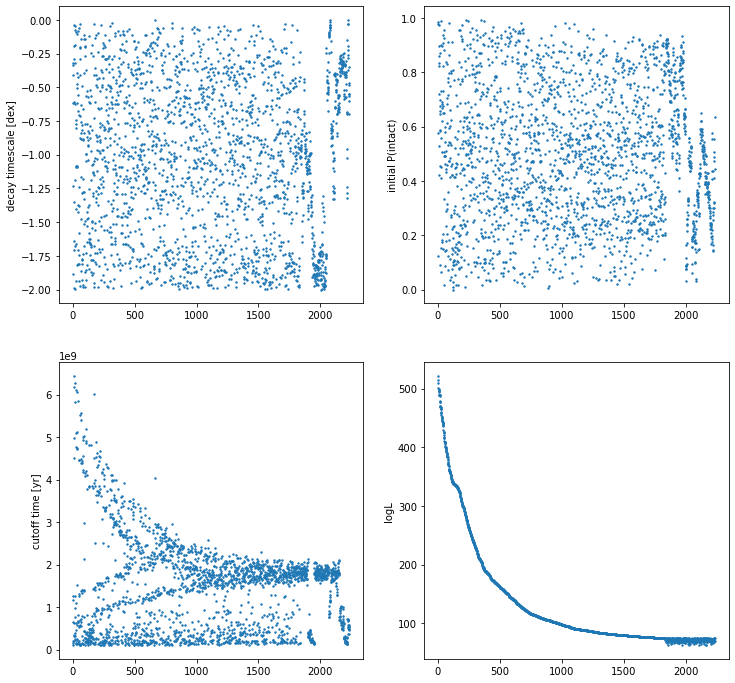

In [38]:
multinest_df = pd.read_csv(path+'hipergator/pymultinest_test/test_1_.txt', sep='\s+',
                           names=['error','logL','m','b','c'])
print(multinest_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(multinest_df.index, multinest_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(multinest_df.index, multinest_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(multinest_df.index, multinest_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(multinest_df.index, multinest_df.logL, s=2)
ax4.set_ylabel('logL')

plt.savefig('posterior_chains_mbc.png', format='png')
plt.show()

[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 ...
 [ 2.64454574  1.61436808  1.11433854]
 [ 1.61445557  0.85716545  0.84458672]
 [ 4.80682382  4.28364397  0.34261772]] (50000, 3)
(2236, 3)


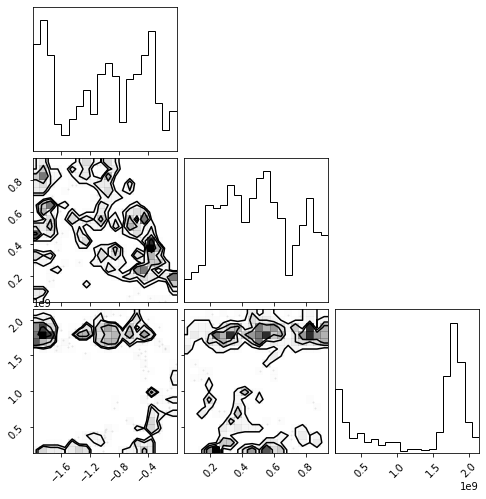

In [25]:
import corner
# Set up the parameters of the problem.
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])
print(data, data.shape)
print(np.array([multinest_df.m, multinest_df.b, multinest_df.c]).T.shape)
figure = corner.corner(np.array([multinest_df.m[1750:], multinest_df.b[1750:], multinest_df.c[1750:]]).T)

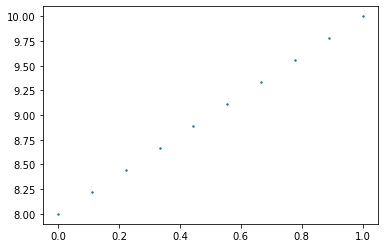

In [33]:
def f(x):
    return 10**(x*2 + 8)

def logf(x):
    transform = 10**(x*2 + 8)
    
    return np.log10(transform)
x = np.linspace(0, 1, 10)
plt.scatter(x, logf(x), s=2)

In [29]:
np.logspace(8,10,11)

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

                                 transit_multiplicity        logL
0             [771.54, 20.24, 16.94, 7.92, 3.08, 0.0] -168.961098
1              [759.66, 32.56, 25.3, 17.82, 7.7, 3.3] -112.812222
2            [1001.66, 177.98, 3.96, 2.2, 1.54, 0.66] -106.399789
3                    [757.9, 0.0, 0.0, 0.0, 0.0, 0.0] -669.219196
4      [579.04, 346.72, 260.26, 178.42, 116.38, 37.4] -557.174404
...                                               ...         ...
21275          [754.38, 40.26, 25.3, 15.4, 5.72, 0.0]  -88.573051
21276         [717.2, 55.88, 46.42, 25.96, 9.24, 0.0]  -67.088561
21277      [745.58, 43.12, 34.32, 23.54, 14.74, 3.74]  -90.445979
21278        [727.54, 44.44, 35.86, 23.76, 6.16, 0.0]  -82.083449
21279         [724.9, 34.1, 27.72, 18.48, 12.1, 6.38] -116.698399

[21280 rows x 2 columns]


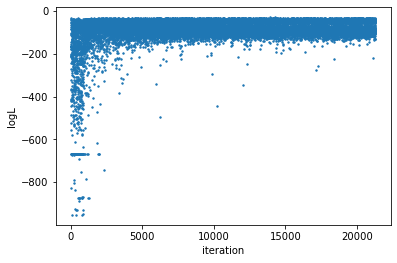

In [75]:
def loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        print(lam)
        return np.nan
    
    return np.sum(logL)    

tm = pd.read_csv(path+'hipergator/pymultinest_test/transit_multiplicity_pymultinest.txt', sep='\t', names=['transit_multiplicity'])
tm.transit_multiplicity = tm.transit_multiplicity.str.strip() # remove indentation
tm.transit_multiplicity = tm.transit_multiplicity.apply(literal_eval)
tm['logL'] = tm['transit_multiplicity'].apply(func=loglike)

print(tm)
threshold = 0 #20000
plt.scatter(np.arange(len(tm))[threshold:], tm.logL[threshold:], s=2)
plt.ylabel('logL')
plt.xlabel('iteration')
plt.show()

How about the one that ran for one day and got its core dumped? 

             error        logL         m         b             c
0     4.784846e-99  519.778678 -1.763823  0.971499  5.954092e+08
1     1.751120e-98  517.178905 -1.417306  0.031429  6.421044e+09
2     5.224158e-98  514.987829 -1.426165  0.846175  6.748577e+09
3     6.095320e-98  514.674373 -0.103794  0.701981  2.311846e+09
4     1.079835e-97  513.525629 -0.589875  0.424789  6.611115e+09
...            ...         ...       ...       ...           ...
1228  1.353686e-05   85.257924 -1.761447  0.693727  2.301348e+08
1229  1.419076e-03   75.953234 -1.922555  0.711785  2.016813e+08
1230  1.005463e-06   90.457861 -1.639388  0.665830  2.113983e+08
1231  6.267544e-05   82.192817 -1.328164  0.553465  2.045406e+08
1232  5.274674e-06   87.142923 -1.328856  0.614174  2.448198e+08

[1233 rows x 5 columns]


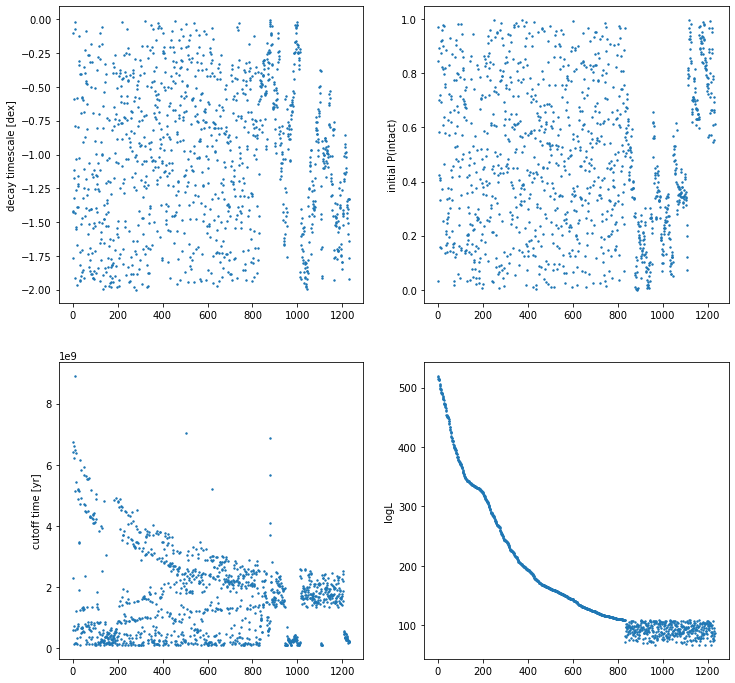

In [74]:
multinest_df = pd.read_csv(path+'hipergator/pymultinest_test/test_1_dumped.txt', sep='\s+',
                           names=['error','logL','m','b','c'])
print(multinest_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(multinest_df.index, multinest_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(multinest_df.index, multinest_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(multinest_df.index, multinest_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(multinest_df.index, multinest_df.logL, s=2)
ax4.set_ylabel('logL')

#plt.savefig('posterior_chains_mbc.png', format='png')
plt.show()

#### Dynesty

              m         b             c  \
1     -0.307307  0.738050  2.011919e+09   
2     -0.612658  0.027046  1.721215e+09   
3     -0.831350  0.175080  4.826018e+08   
4     -1.471924  0.485669  4.593056e+08   
5     -0.110488  0.086787  3.030840e+08   
...         ...       ...           ...   
4824  -0.893308  0.156297  1.432862e+08   
4825  -1.934035  0.517697  5.584970e+09   
4826  -0.494248  0.313229  1.895584e+09   
4827  -0.537379  0.691869  2.538030e+09   
4828  -0.078710  0.528328  1.685642e+08   

                                   transit_multiplicity        logL  
1     692.560000,162.580000,123.200000,70.180000,27.... -116.601839  
2     754.380000,40.260000,21.560000,19.140000,7.040...  -91.672318  
3     752.840000,0.000000,0.000000,0.000000,0.000000... -669.739237  
4     1027.620000,177.760000,0.000000,0.000000,0.000... -168.914749  
5     738.100000,10.780000,11.000000,6.160000,2.6400... -261.294613  
...                                                 ...        

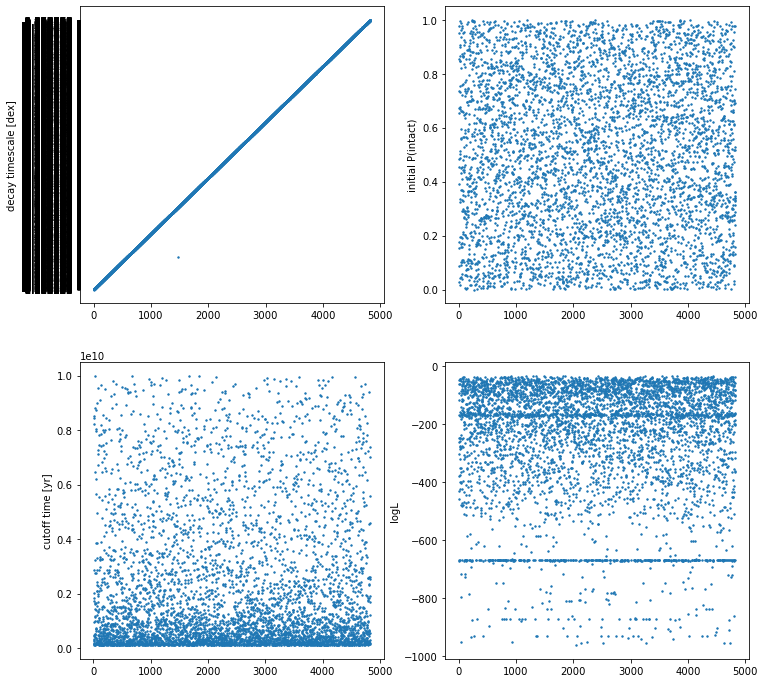

In [50]:
dynesty_df = pd.read_csv(path+'hipergator/dynesty1.txt', sep='\s+', skiprows=0,
                           names=['m','b','c','transit_multiplicity','logL',])
dynesty_df = dynesty_df.iloc[1:]
print(dynesty_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(np.arange(len(dynesty_df)), dynesty_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(dynesty_df.index, dynesty_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(dynesty_df.index, dynesty_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(dynesty_df.index[:], dynesty_df.logL[:], s=2)
ax4.set_ylabel('logL')

#plt.savefig('posterior_chains.eps', format='eps')
plt.show()